<a href="https://colab.research.google.com/github/Rogerio-mack/Visualizacao-de-Dados-em-Python/blob/main/c2_parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gráficos com `Matplotlib`**
<hr>

O pacote `Matplotlib` é uma biblioteca gráfica para visualização de dados em `Python`. Ela é desenvolvida sobre arrays `NumPy` e uma das bibliotecas mais empregadas para visualização de dados em `Python`. Outros importantes  pacotes de visualização de dados como o `Seaborn`, `Plotly`, `Altair` estendem a interface do `Matplotlib`. Por isso, é importante entender como produzir gráficos com o `Matplotlib` e é a biblioteca que usaremos na maior parte dos casos aqui. O `Seaborn` é uma biblioteca de visualização de dados `Python` construída sobre `Matplotlib` que fornece uma interface de mais alto nível para desenhar gráficos e possui muitos recursos atraentes e em alguns casos empregaremos essa biblioteca.  

Neste capítulo, antes de estudarmos que gráficos empregar para cada tipo de análise ou pergunta sobre os dados, você vai aprender como empregar o `Matplotlib` e criar gráficos a partir de dados simples. 

## Um gráfico de linha simples `plt.plot(x,y)`

Os gráficos de linha são os gráficos mais simples e, antes explorarmos outros tipos de gráficos, vamos entender como criar gráficos de linha com o `Matplotlib`. Eles ainda são particularmente úteis para representar gráficos de funções. 

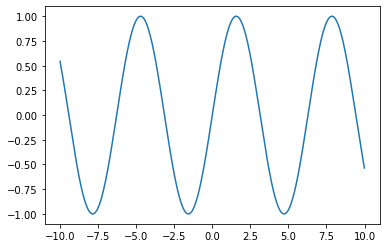

In [2]:
import numpy as np

import matplotlib.pyplot as plt             
%matplotlib inline

x = np.arange(-10,10,0.01)

plt.plot(x, np.sin(x))
plt.show()

Acima você encontra primeiramente o `import` do pacote `Matplotlib`.  

Você pode empregar o `Matplotlib` em um script `Python`, em um terminal `Python` interativo (`IPython`) ou em um `Python notebook`. Todas as execuções aqui serão feitas em `Python notebooks` e ao empregarmos o comando `%matplotlib inline` estamos dizendo ao backend de execução do `Python` que os gráficos produzidos pelo `Matplotlib` serão incluídos em seu notebook, juntamente com o código. 

A função `show()` concluí a exibição de um gráfico. Ela atua com o backend gráfico interativo do sistema e os detalhes de suas operações variam conforme o contexto de execução. Basicamente ela procura os objetos ativos para a construção da figura abre uma ou mais janelas para exibir a saída dos gráficos. No caso de uma execução em `Python notebook`, ela exibe a figura abaixo da célula de código sem a numeração da célula `out[]` (para Jupyter notebooks) ou texto de referência do objeto construído (Colab). Ela aparece no final dos scripts de comandos gráficos e uma única vez.  

Você ainda pode adicionar títulos, rótulos aos eixos, legendas e alterar propriedades da linha como estilo e cor. 

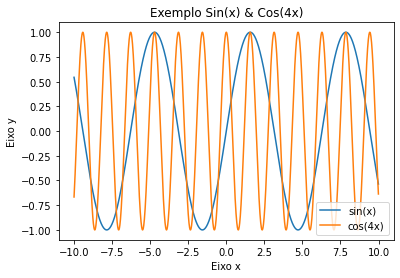

In [3]:
import numpy as np

import matplotlib.pyplot as plt             
%matplotlib inline

x = np.arange(-10,10,0.01)

plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(4*x), label='cos(4x)')

plt.title('Exemplo Sin(x) & Cos(4x)')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.legend()

plt.show()

Note que gráficos das duas funções acimas são sobrepostos. Ao executar o comando `plot` existe uma única 'figura' ativa, e todos os comandos, como título, legendas e rótulos, são direcionados do mesmo modo que o `plot` para a mesma figura. A função `show()` se encarrega depois de combinar todos objetos ativos em uma única figura. Experimente inlcuir o `plt.show()` após o primeiro `plot` e veja o resultado.

## Empregando a interface direta ou de objetos `Script Layer` & `Artist Layer` 

Os comandos em `Matplotlib` podem ser empregados de duas formas. Na interface direta (ou `Script Layer`) o `Matplotlib` mantém o controle da figura e eixos 'atuais' onde as funções `plt` serão aplicadas. Essa é uma forma simples e útil, e vamos usá-la na maior parte do tempo. É, entretanto, uma forma complicada quando trabalhamos com múltiplos gráficos ou conjuntos de gráficos com uma apresentação muito complexa. 

A interface orientada a objetos (ou `Artist Layer`) permite um maior controle das figuras e você deve preferir essa interface quando múltiplos gráficos ou figuras muito elaboradas são empregados. Nela você pode apontar explicitamente a 'figura' (`fig`) os gráficos contidos dentro dela (`ax` ou `axis` dependendo do caso).

Compare os gráficos abaixo. O primeiro emprega a interface direta. Em uma figura com múltiplos gárficos, cada novo gráfico é ativado (`subplot(linhas, colunas, gráfico ativo)`) e todos os comandos `plt` são então direcionados para o gráfico ativo. A execução seguinte emprega a interface orientada a objetos e os comando `plot` são direcionados explicitamente para cada gráfico (`ax[i]`).

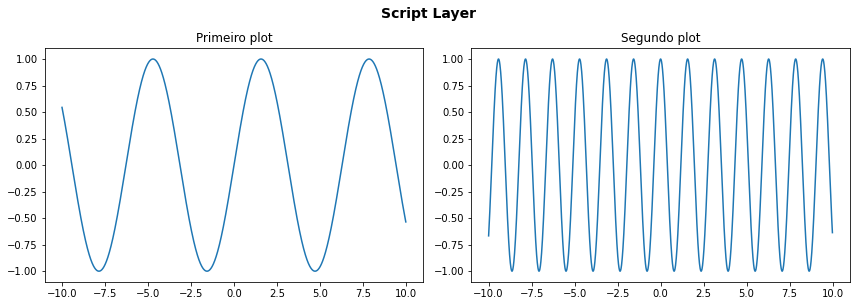

In [4]:
plt.figure(figsize=(12,4)) # cria uma figura alterando o tamanho, figsize=(tamanho_horizontal,tamanho_vertical)

plt.suptitle('Script Layer', fontsize=14, weight='bold', y=1.05)

# cria e ativa um gráfico na figura
plt.subplot(1, 2, 1) # (linhas, colunas, gráfico ativo)
plt.plot(x, np.sin(x))
plt.title('Primeiro plot')

# cria e ativa um segundo gráfico na figura
plt.subplot(1, 2, 2) # (linhas, colunas, gráfico ativo)
plt.plot(x, np.cos(4*x));
plt.title('Segundo plot')

plt.tight_layout()
plt.show()

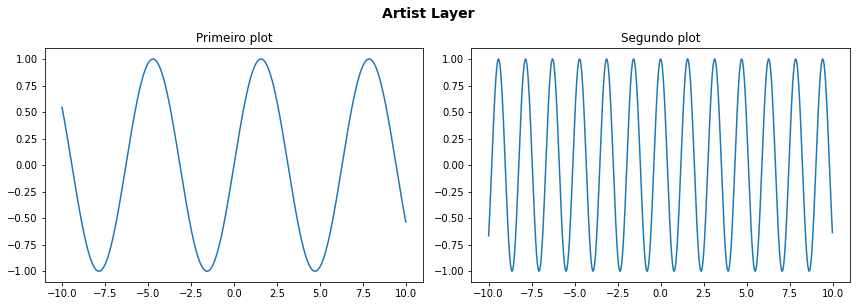

In [5]:
# Cria uma grade de gráficos com 1 linha e 2 colunas de gráficos, ax é um vetor em que cada elemento corresponde a um gráfico da grade
fig, ax = plt.subplots(1,2,figsize=(12,4)) # cria uma figura alterando o tamanho, figsize=(tamanho_horizontal,tamanho_vertical)

plt.suptitle('Artist Layer', fontsize=14, weight='bold', y=1.05)

# Os comandos podem então ser direcionados para o gráfico específico
ax[0].plot(x, np.sin(x))
ax[0].set_title('Primeiro plot')

ax[1].plot(x, np.cos(4*x));
ax[1].set_title('Segundo plot')

plt.tight_layout()
plt.show()

Mais adiante você verá melhor como criar múltiplos gráficos. Por hora é suficiente você entender que existem essas duas formas de trabalho com o  `Matplotlib`.

## Propriedades de linha `linestyle`, `marker`, `color`, `linewidth` e `markersize`

Você pode alterar várias das propriedades das linhas dos gráficos como estilo da linha, cor e sua espessura. Isso é importante para diferenciar várias linhas em um mesmo gráfico ou ainda se você quiser dar destaque a uma ou mais linhas. 

Essas propriedades podem ser codificadas explicitamente: 

```
plt.plot(x, np.cos(x), linestyle='dashed', marker='o', color='green', linewidth=1, markersize=6)
```

Ou de forma resumida:

```
plt.plot(x, np.cos(x), '--og', linewidth=1, markersize=6)
```

A expressão `'--og'` agrupa os parâmetros `--`, `o` e `g` e indicam respectivamente os mesmos parâmetros que o modo explícito `linestyle='dashed', marker='o', color='green'`. Mesmo na forma resumida eles podem aparecer em qualquer ordem, uma vez que os símbolos de cada parâmetro não se repetem. As cores nesse modo ficam entretanto limitadas ao um conjunto de cores básicas `rgbcmyk` (`r`=red, `g`=green, ...). 

O esquema de cores é bastante sofisticado e permite empregar de cores básicas à tons de cinza, como também especificar valores de cada componente RGB (esquema de combinação de cores básicas Red, Green, Blue) e transparência de linhas (parâmetro `alpha`). 

A seguir o primeiro gráfico mostra como empregar o uso dos parâmetros explícitos e de forma resumida, e o gráfico seguinte mostra como essas configurações podem ser empregadas para dar destaque a uma ou mais linhas em um gráfico. 




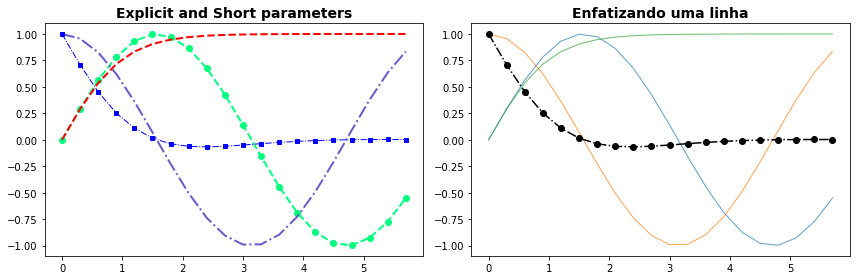

In [6]:
x = np.arange(0, 6, 0.3)

fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.title('Explicit and Short parameters', fontsize=14, weight='bold')
plt.plot(x, np.sin(x), color='springgreen', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.plot(x, np.cos(x), color='slateblue', linestyle='dashdot', linewidth=2)

# short color code (rgbcmyk)
plt.plot(x, np.tanh(x), '--r', linewidth=2, markersize=6)
plt.plot(x, 1/np.exp(x)*np.cos(x), '-.sb', linewidth=1, markersize=4)

plt.subplot(1, 2, 2)
plt.title('Enfatizando uma linha', fontsize=14, weight='bold')
plt.plot(x, np.sin(x), linewidth=1, alpha=0.7)
plt.plot(x, np.cos(x), linewidth=1, alpha=0.7)
plt.plot(x, np.tanh(x), linewidth=1, alpha=0.7)
plt.plot(x, 1/np.exp(x)*np.cos(x), '-.ok')

plt.tight_layout()
plt.show()


> $\bigstar \text{  }$ *Você pode empregar diferentes estilos de linha apenas para diferenciar as linhas em gráficos de múltiplos, mas também pode empregar o recurso para destacar a uma ou mais linhas do gráfico.* 

Abaixo você também encontra alguns exemplos de estilos de linha, marcadores e cores básicas mais empregados. Eles serão suficientes aqui e você pode consultar a documentação do `Matplotlib` para uma relação completa desses parâmetros. 

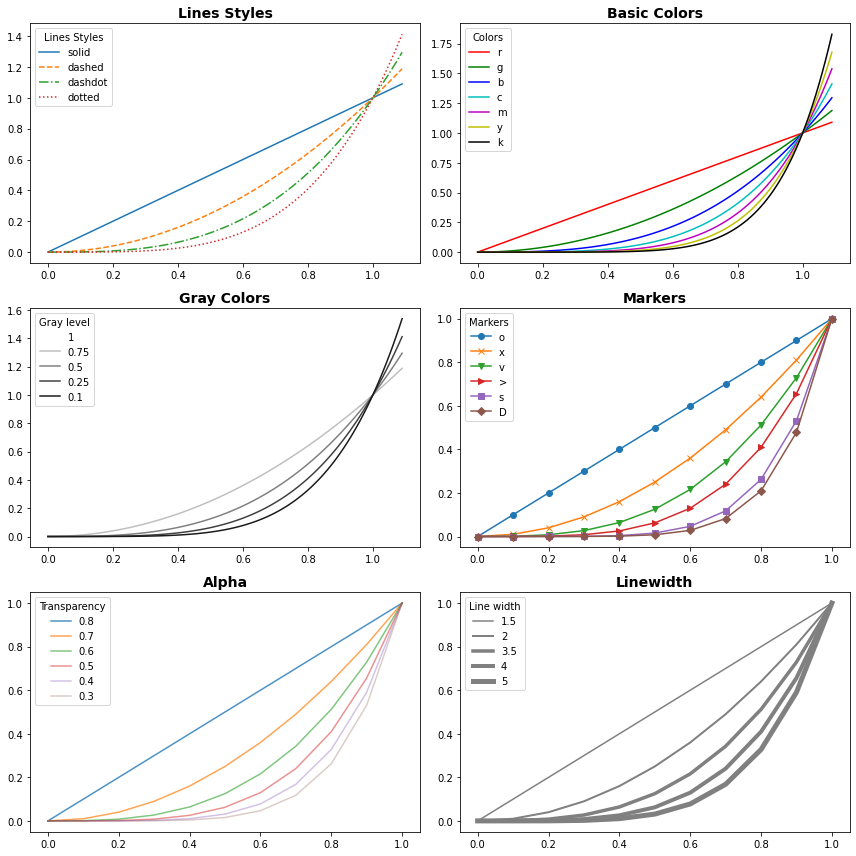

In [7]:
x = np.arange(0.0, 1.1, 0.01)

fig = plt.figure(figsize=(12,12))

plt.subplot(3, 2, 1)
plt.title('Lines Styles', fontsize=14, weight='bold') # automatic colors
plt.plot(x, x**1, linestyle='solid', label='solid')
plt.plot(x, x**2, linestyle='dashed', label='dashed')
plt.plot(x, x**3, linestyle='dashdot', label='dashdot')
plt.plot(x, x**4, linestyle='dotted', label='dotted')
plt.legend(title='Lines Styles')

plt.subplot(3, 2, 2)
plt.title('Basic Colors', fontsize=14, weight='bold')
plt.plot(x, x**1, color='r', label='r')
plt.plot(x, x**2, color='g', label='g')
plt.plot(x, x**3, color='b', label='b')
plt.plot(x, x**4, color='c', label='c')
plt.plot(x, x**5, color='m', label='m')
plt.plot(x, x**6, color='y', label='y')
plt.plot(x, x**7, color='k', label='k')
plt.legend(title='Colors')

plt.subplot(3, 2, 3)
plt.title('Gray Colors', fontsize=14, weight='bold')
plt.plot(x, x**1, color='1', label='1')
plt.plot(x, x**2, color='0.75', label='0.75')
plt.plot(x, x**3, color='0.5', label='0.5')
plt.plot(x, x**4, color='0.25', label='0.25')
plt.plot(x, x**5, color='0.1', label='0.1')
plt.legend(title='Gray level')

x = np.arange(0.0, 1.1, 0.1) # para melhor exibição dos dados com markers

plt.subplot(3, 2, 4)
plt.title('Markers', fontsize=14, weight='bold')
plt.plot(x, x**1, marker='o', label='o')
plt.plot(x, x**2, marker='x', label='x')
plt.plot(x, x**3, marker='v', label='v')
plt.plot(x, x**4, marker='>', label='>')
plt.plot(x, x**6, marker='s', label='s')
plt.plot(x, x**7, marker='D', label='D')
plt.legend(title='Markers')

# o parâmetro alpha permite configurar um grau de transparência nas cores de linha
plt.subplot(3, 2, 5)
plt.title('Alpha', fontsize=14, weight='bold')
plt.plot(x, x**1, alpha=0.8, label='0.8')
plt.plot(x, x**2, alpha=0.7, label='0.7')
plt.plot(x, x**3, alpha=0.6, label='0.6')
plt.plot(x, x**4, alpha=0.5, label='0.5')
plt.plot(x, x**5, alpha=0.4, label='0.4')
plt.plot(x, x**6, alpha=0.3, label='0.3')
plt.legend(title='Transparency')

# empregando diferente espessuras de linha
plt.subplot(3, 2, 6)
plt.title('Linewidth', fontsize=14, weight='bold')
plt.plot(x, x**1, color='0.5', linewidth=1.5, label='1.5')
plt.plot(x, x**2, color='0.5', linewidth=2, label='2')
plt.plot(x, x**3, color='0.5', linewidth=3.5, label='3.5')
plt.plot(x, x**4, color='0.5', linewidth=4, label='4')
plt.plot(x, x**5, color='0.5', linewidth=5, label='5')
plt.legend(title='Line width')

plt.tight_layout()
plt.show()

## Textos: `title`, `labels`, `lengend` e `text`

Textos são um complemento importante de qualquer gráfico. Sem eles você não tem como saber exatamente ao que se refere cada eixo, sua escala ou sua unidade de medida. O título ainda pode explicitar a mensagem que você deseja passar e anotações ainda podem ajudar a indicar pontos específicos do gráfico que você deseja destacar. 

O `Matplotlib`, como outros pacotes de visualização, permite adicionar inúmeras anotações aos  gráficos como títulos, rótulos ou labels para as linhas, nomear os eixos ou até mesmo inserir uma anotação em uma posição específica do gráfico. Isso é muito importante para tornar claras as informações exibidas.

> $\bigstar \text{  }$ *Textos como rótulos dos eixos e outras anotações **não são opcionais**. A menos que conheça o contexto, não tem como você saber se um gráfico está apresentando a evolução de uma ação na bolsa no último ano ou a mudança de temperatura global na última década!*





O exemplo a seguir mostra como definir um título para o seu gráfico, nomear os eixos e como inserir rótulos (labels) para cada uma das linhas de um gráfico que emprega várias linhas. 
 


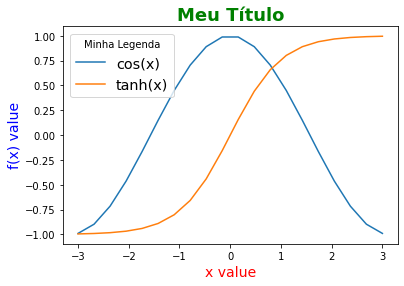

In [8]:
x = np.linspace(-3, 3, 20)

plt.figure()

# Adicionando labels às diferentes linhas do gráfico
plt.plot(x, np.cos(x), label='cos(x)')
plt.plot(x, np.tanh(x), label='tanh(x)')

# Adicionando o Título
plt.title('Meu Título', color='green', fontsize=18, weight='bold', ha='center')

# Nomeando os eixos
plt.xlabel('x value', color='red', fontsize=14)
plt.ylabel('f(x) value', color='blue', fontsize=14)

# Exibindo a legenda
plt.legend(title='Minha Legenda', loc='best', fontsize='x-large')

plt.show()



Títulos e rótulos aceitam todas as configurações comuns de editores de texto como tamanhos de fonte (`fontsize`), cor (`color`), estilos (como por exemplo `weight='bold'` e `style='italic'`). Para tipos de fonte diferentes é necessário modificar parâmetros à partir do `plt.rcParams` e você pode querer experimentar por exemplo `plt.rcParams["font.family"] = "fantasy"` ou um outro tipo de fonte. Aqui manteremos sempre o uso da fonte padrão. 

Os títulos podem ser alinhados no centro (padrão), à esquerda ou à direita usando o parâmetro `ha` (`horizontalalignment`, e valores `'center','right'` ou `'left'`) e você pode deixar para o `Matplotlib` definir a melhor posição da legenda ou empregar o parâmetro de localização `loc` (`loc='upper right'`, `loc='lower left'`, `loc='center left'` etc.).

Quando trabalhando com múltiplos gráficos pode ser necessário adicionar também um `suptitle` ao conjunto de gráficos e empregamos isso em um exemplo anterior quando apresentamos o modo `Artist Layer`:

```
plt.suptitle('Artist Layer', fontsize=14, weight='bold', y=1.05)
``` 

O `y=1.05` coloca o `suptitle` 0.05 acima da figura e evita a sobre posição dos títulos. O comando `plt.tight_layout()`, no mesmo exemplo, ajusta o automaticamente o layout da figura para evitar sobreposições dos gráficos, como por exemplo dos textos dos eixos de um gráfico com outro e vamos empregar bastante esse comando aqui.   

> $\bigstar \text{  }$ *Anotações dentro de um gráfico são essencias quando se quer chamar a atenção do leitor para um determinado ponto do gráfico.*

Para isso o `Matplotlib` fornece duas funções, o `plt.text()` e o `plt.annotate()`. O primeiro simplesmente adiciona um texto em uma posição `x, y`, o segundo, insere o texto adicionando uma seta do texto a um ponto do gráfico. 

Pontos específicos no gráfico podem ainda ser destacados, ou com o comando `plot()` destacando um ponto em coordenada específica, ou com a adição de linhas verticais (`vlines()`) ou horizontais (`hlines()`) informando a posição e os limites mínimo e máximo de cada linha.

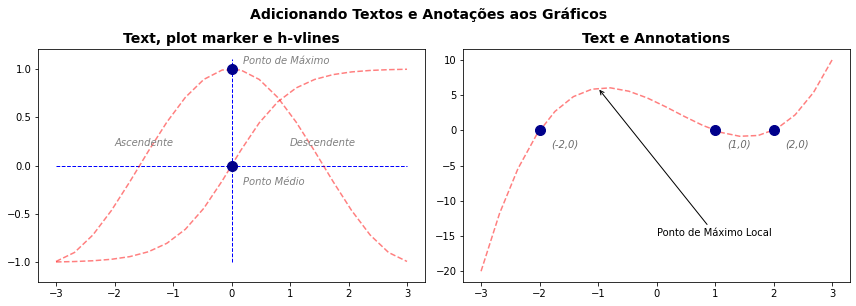

In [9]:
x = np.linspace(-3, 3, 20)

fig = plt.figure(figsize=(12,4))
plt.suptitle('Adicionando Textos e Anotações aos Gráficos', fontsize=14, weight='bold', y=1.05)

plt.subplot(1, 2, 1)
plt.title('Text, plot marker e h-vlines', fontsize=14, weight='bold')
plt.plot(x, np.tanh(x), 'r--', alpha=0.5)
plt.plot(x, np.cos(x), 'r--', alpha=0.5)
plt.ylim([-1.2,1.2])

# Enfatizando um ponto específico do gráfico
plt.plot(0, 1, marker = 'o' , color = 'darkblue', markersize= 10)
plt.plot(0, 0, marker = 'o' , color = 'darkblue', markersize= 10)

# Adicionando anotações
plt.text(0 + 0.2, 0 - 0.2, 'Ponto Médio', style='italic', color='grey')
plt.text(0 + 0.2, 1 + 0.05, 'Ponto de Máximo', style='italic', color='grey')
plt.text(-2.0, 0.2, 'Ascendente', style='italic', color='grey')
plt.text(1, 0.2, 'Descendente', style='italic', color='grey')

# Adicionando linhas verticais e horizontais
plt.vlines(0, -1, 1.1, linestyle='dashed', color='b', linewidth=1) # vlines(posição, início, fim)
plt.hlines(0, -3, 3, linestyle='dashed', color='b', linewidth=1) # hlines(posição, início, fim)

plt.subplot(1, 2, 2)
plt.title('Text e Annotations', fontsize=14, weight='bold')
plt.plot(x, (x + 2) * (x - 1) * (x - 2), 'r--', alpha=0.5)

# Enfatizando vários pontos do gráfico
plt.plot([-2, 1, 2], [0, 0, 0], 'o', color='darkblue', markersize=10)

# Adicionando anotações
plt.text(-2 + 0.2, 0 - 2.4, '(-2,0)', style='italic', color='dimgrey')
plt.text(1 + 0.2, 0 - 2.4, '(1,0)', style='italic', color='dimgrey')
plt.text(2 + 0.2, 0 - 2.4, '(2,0)', style='italic', color='dimgrey')

# Annotate
plt.annotate('Ponto de Máximo Local', 
             xy=(-1, 6),                # ponto do gráfico
             xytext=(0, -15),           # posição do texto
             arrowprops=dict(arrowstyle="->")) 

plt.tight_layout()                    
plt.show()


Uma outra forma útil de destaque nos gráficos pode ser preencher as áreas sob o gráfico (gráficos de área). Para isso você pode pode empregar `plt.fill_between(x,y)`, para preencher a área sob um gráfico, ou ainda `plt.fill_between(x,y,linha-média)` para preencher a área entre o gráfico e uma linha média. O padrão para linha média é 0.

Se você conhece distribuições de probabilidade, pode reconhecer nos exemplos abaixo os gráficos de densidade de probabilidade (PDF) e probabilidade acumulada (CDF) de uma distribuição normal com média $0$ e desvio padrão $1$. A probabilidade $P(x \le -0.5)$  é dada pela área sob a curva do gráfico de densidade de probabilidade no intervalo de $[0, -0.5]$, ou diretamente pela pelo gráfico de distribuição de probabilidade acumulada. Você verá mais sobre isso no capítulo de Distribuição.

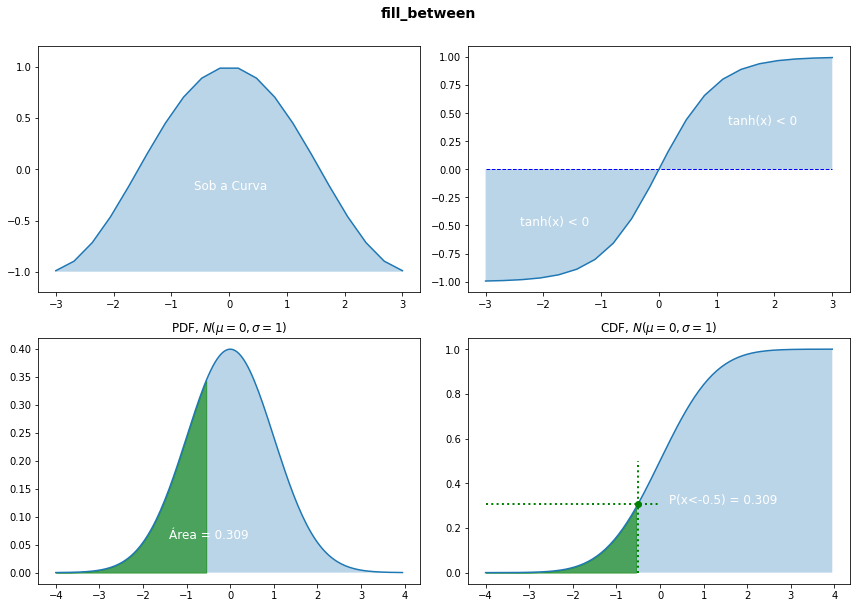

In [11]:
x = np.linspace(-3, 3, 20)

fig = plt.figure(figsize=(12,8))
plt.suptitle('fill_between', fontsize=14, weight='bold', y=1.05)

plt.subplot(2, 2, 1)
plt.plot(x, np.cos(x))

# Fill
plt.fill_between(x, np.cos(x), -1, alpha=0.3)

# Adicionando anotações
plt.text(-0.6, -0.2, 'Sob a Curva', color='white', fontsize=12)
plt.ylim([-1.2,1.2])

plt.subplot(2, 2, 2)
plt.plot(x, np.tanh(x))

# Fill
plt.fill_between(x, np.tanh(x), alpha=0.3)

# Adicionando anotações
plt.text(-2.4, -0.5, 'tanh(x) < 0', color='white', fontsize=12)
plt.text(1.2, 0.4, 'tanh(x) < 0', color='white', fontsize=12)
# hline
plt.hlines(0, -3, 3, linestyle='dashed', color='b', linewidth=1)

# apenas para construção dos dados de uma distribuição normal
#-------------------------------------------------------------------------------
from scipy.stats import norm 
pdf = []
cdf = []
for a in np.arange(-4,4,0.05):
  pdf.append(norm.pdf(a))
  cdf.append(norm.cdf(a))  

plt.subplot(2, 2, 3)
plt.title('PDF, $N(\mu=0, \sigma=1)$',fontsize=12)
plt.plot(np.arange(-4,4,0.05),pdf)

# Fill
plt.fill_between(np.arange(-4,4,0.05), pdf, alpha=0.3)    
plt.fill_between(np.arange(-4,-0.5,0.05), pdf[0:len(np.arange(-4,-0.5,0.05)+1)], color='g', alpha=0.6) 

# Adicionando anotações
plt.text(-1.4, 0.06, f'Área = { norm.cdf(-0.5) :.3f}',fontsize=12, color='white')

plt.subplot(2, 2, 4)
plt.title('CDF, $N(\mu=0, \sigma=1)$',fontsize=12)
plt.plot(np.arange(-4,4,0.05),cdf)

# Fill
plt.fill_between(np.arange(-4,4,0.05), cdf, alpha=0.3)    
plt.fill_between(np.arange(-4,-0.5,0.05), cdf[0:len(np.arange(-4,-0.5,0.05)+1)], color='g', alpha=0.6) 

# Adicionando anotações
plt.vlines(-0.5,0,max(cdf)-max(cdf)/2,linewidth=2,linestyle=':',colors='g') 
plt.hlines(norm.cdf(-0.5), -4, 0, linewidth=2,linestyle=':',colors='g')  
plt.plot(-0.5,norm.cdf(-0.5),'go')

plt.text(0.2, norm.cdf(-0.5), f'P(x<-0.5) = { norm.cdf(-0.5) :.3f}',fontsize=12, color='white')



plt.tight_layout()                    
plt.show()


## Limite dos eixos e escalas `xlim`, `ylim` e `ticker`

O `Matplotlib` ajusta automaticamente os limites dos valores dos eixos x e y e as escalas empregadas. Muitas vezes, entretanto, esses valores não são os mais adequados e você pode querer alterá-los. O limites dos valores podem ser definidos empregando as funções `xlim` e `ylim`. 

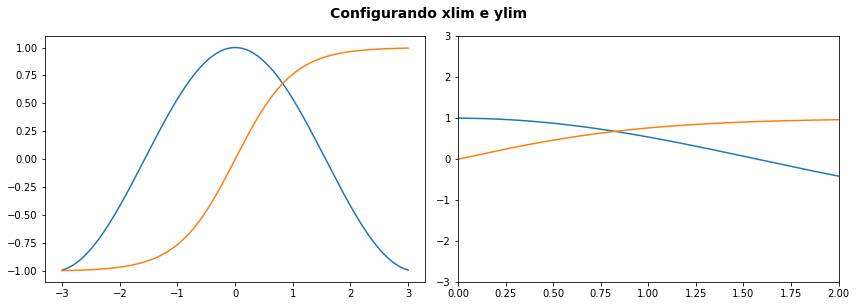

In [12]:
x = np.linspace(-3, 3, 200)

fig = plt.figure(figsize=(12,4))
plt.suptitle('Configurando xlim e ylim', fontsize=14, weight='bold', y=1.05)

plt.subplot(1,2,1)
plt.plot(x, np.cos(x))
plt.plot(x, np.tanh(x))

plt.subplot(1,2,2)
plt.plot(x, np.cos(x))
plt.plot(x, np.tanh(x))
plt.xlim([0,2])
plt.ylim([-3,3])

plt.tight_layout()
plt.show()

A modificação da régua dos eixos (a escala) é um pouco mais trabalhosa. Ela pode ser feita melhor empregando a interface orientada a objeto (`Artist Layer`), exigindo ainda o uso da classe `ticker` e dos métodos de eixo `x|y axis.set_major_locator`. O primeiro gráfico da figura anterior encontra-se abaixo com as escalas alteradas em duas formas diferentes.

Mas esse é um recurso avançado e, para maior parte dos casos o ajuste automático do `Matplotlib` é bastante suficiente.

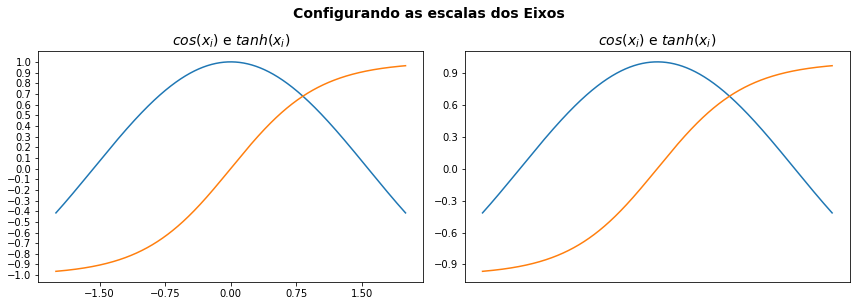

In [ ]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(1,2,figsize=(12,4))
plt.suptitle('Configurando as escalas dos Eixos', fontsize=14, weight='bold', y=1.05)

# Mais pontos gerados para exibir diferentes réguas de dados nos eixos
x = np.linspace(-2, 2, 10000)

ax[0].set_title('$cos(x_i)$ e $tanh(x_i)$', fontsize=14)
ax[0].plot(x, np.cos(x))
ax[0].plot(x, np.tanh(x))

# Definindo o intervalo dos valores a serem exibidos nos eixos 
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(0.75))
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(0.1))

ax[1].set_title('$cos(x_i)$ e $tanh(x_i)$', fontsize=14)
ax[1].plot(x, np.cos(x))
ax[1].plot(x, np.tanh(x))

# Suprimindo a régua de valores no eixo x
ax[1].xaxis.set_major_locator(ticker.NullLocator())

# Definindo a quantidade de pontos a ser exibida na régua
ax[1].yaxis.set_major_locator(ticker.MaxNLocator(8))

plt.tight_layout()
plt.show()


Ao trabalhar múltiplos gráficos em uma figura podemos querer compartilhar as escalas dos eixos x e y deixando mais limpa e elegante a exibição dos gráficos. Para isso você pode empregar os parâmetros `sharex` ou `sharey` da função `subplots` conforme a escala do eixo que deseja compartilhar. No exemplo abaixo ainda inserimos uma 'grade' ao gráfico apresentando, assim, mais esse recurso.

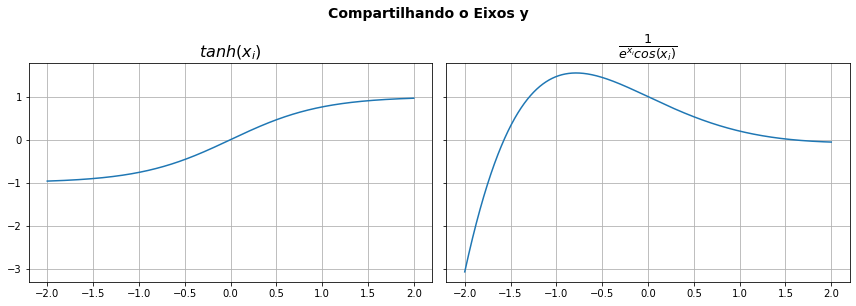

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4), sharey=True, sharex=True)
plt.suptitle('Compartilhando o Eixos y', fontsize=14, weight='bold', y=1.05)

# Mais pontos gerados para exibir diferentes réguas de dados nos eixos
x = np.linspace(-2, 2, 10000)

ax[0].set_title('$tanh(x_i)$', fontsize=16)
ax[0].plot(x, np.tanh(x))
ax[0].grid()

ax[1].set_title('$\\frac{1}{e^{x_i} cos(x_i)}$', fontsize=18)
ax[1].plot(x, 1/np.exp(x)*np.cos(x))
ax[1].grid()

plt.tight_layout()
plt.show()

Talvez você tenha notado que nos dois últimos exemplos, diferente dos exemplos anteriores, empregamos a interface orientada a objetos no lugar da interface direta e que comando para inserir o título foi ligeiramente diferente da forma que empregamos antes.

> $\bigstar \text{  }$ *Ao empregar a interface orientada a objetos as funções para se definir limites, rótulos e títulos diferem ligeiramente das funções empregadas na interface direta.* 

A maior parte das funções `plt` pode ser aplicada diretamente como métodos de eixo (por exemplo `plt.plot() → ax.plot()`) mas os comandos para definir limites, rótulos e títulos diferem ligeiramente quando empregados na interface orientada a objeto e adiciona-se o prefixo `set_` aos comandos: 

> ``plt.title()`` → ``ax.set_title()``

> ``plt.xlabel()``  → ``ax.set_xlabel()``

> ``plt.ylabel()`` → ``ax.set_ylabel()``

> ``plt.xlim()``  → ``ax.set_xlim()``

> ``plt.ylim()`` → ``ax.set_ylim()``

E o comando `ax.set()` ainda pode ser empregado para definir todas essas propriedades simultaneamente.

## $\LaTeX$

No exemplo anterior criamos títulos com expressões matemáticas empregando o texto entre símbolos `$`. Se você está familiarizado com a notação $\LaTeX$ para símbolos e expressões matemáticas você poderá empregar essa notação também nos textos do `Matplotlib` e é particularmente elegante para expressões que envolvem símbolos matemáticos como $\pi$, $\alpha$, $\lambda$, $\ge$, $\neq$, $\subseteq$, funções como $f(x)$, $\sigma(x)$, $\omega(x)$, $\cos(\theta)$ ou ainda expressões mais complexas como:

$$e = \mathop {\lim }\limits_{n \to \infty } \left( {1 + \frac{1}{n}} \right)^n$$

## Empregando Estilos

Como muitos outros pacotes de visualização o `Matplotlib` implementa um padrão de visualização dos dados como cores, estilos de linha, fontes que você pode alterar se quiser. Isso é muito útil por que permite que você não precise ficar definindo todas essas configurações, podendo adotar a configuração padrão e alterando somente os elementos que são de interesse. De fato, muitas vezes, empregamos somente as configuração padrão para produzir gráficos rapidamente para, em seguida, modificar os parâmetros conforme a nossa necessidade. 

Mas o `Matplotlib` ainda implementa vários *estilos* predefinidos com padrões diferentes que você pode escolher. 

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Por exemplo, o estilo 'ggplot' emula a estética do `ggplot`, um importante pacote de visualização da linguagem R. Para usar esse estilo, basta você empregar:

```
plt.style.context('ggplot') 
```
para todos os gráficos da sua sessão, ou ainda:

```
with plt.style.context('stylename'):
  <seu plot> 
```
para configurar temporariamente um estilo. 

Você pode ver abaixo gráficos com diferentes estilos padrão do `Matplotlib`, e pode modificar o código para experimentar outros.

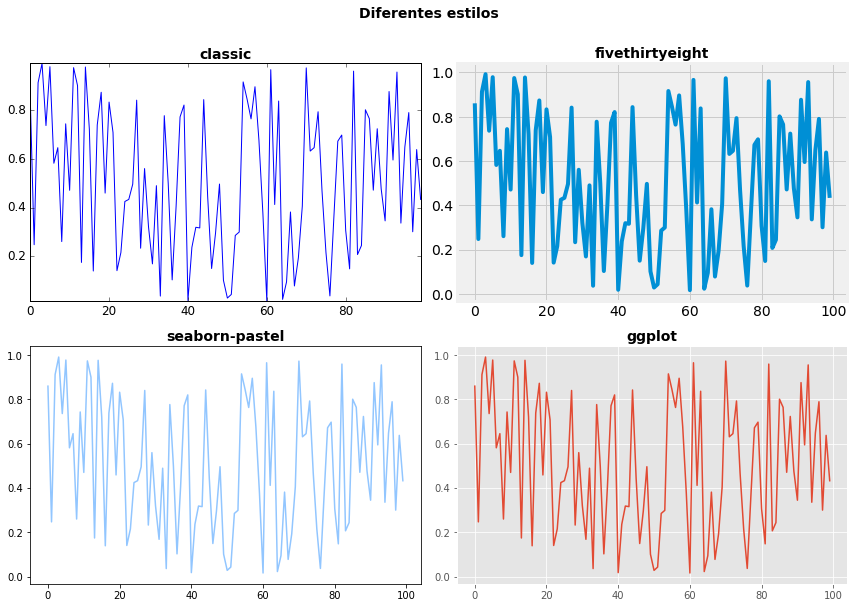

In [ ]:
# apenas a produção dos dados
x = np.random.random_sample(100)

plt.figure(figsize=(12,8))                         
plt.suptitle('Diferentes estilos', fontsize=14, weight='bold', y=1.05)

i = 1
for style in ['classic','fivethirtyeight','seaborn-pastel','ggplot']:
  with plt.style.context(style):
    plt.subplot(2, 2, i)  
    plt.plot(x)     
    plt.title(style, fontsize=14, weight='bold')    
    i = i + 1                   

plt.tight_layout()
plt.show()

plt.style.context('default')
plt.show()

## `rcParams`

Essa é uma forma mais avançada e acessar e modificar os parâmetros do `Matplotlib`, mas vale aqui ao menos a apresentação desse recurso que pode ser útil para você em algum caso. O `plt.rcParams` é um array que contem todos parâmetros da sessão `Matplotlib` e você pode empregar:
```
print(plt.rcParams)
```
para verificar todos os parâmetros, ou:
```
print(plt.rcParams.get( <parâmetro> ))
```
para recuperar um parâmetro específico da sua sessão. 

In [ ]:
print(list(plt.rcParams)[10:15])   # somente 5 os primeiros parâmetros
 
print(plt.rcParams.get('lines.linewidth'))
print(plt.rcParams.get('lines.color'))
print(plt.rcParams.get('font.size'))

['animation.ffmpeg_path', 'animation.frame_format', 'animation.html', 'animation.html_args', 'animation.writer']
1.5
C0
10.0


Esses parâmetros valem para toda a sessão e também podem ser alterados. Uma boa prática neste caso é salvar os parâmetros padrão antes de alterá-los e você tem um exemplo abaixo de como alterar e restaurar parâmetros desse modo.

In [ ]:
import matplotlib.pyplot as plt

# save rcParams
`IPython`_default = plt.rcParams.copy()

plt.rc('lines', linewidth=2, color='r')

# que é o mesmo que:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'

plt.rc('font', size=12)  

print(plt.rcParams.get('lines.linewidth'))
print(plt.rcParams.get('lines.color'))
print(plt.rcParams.get('font.size'))

# reset rcParams
plt.rcParams = `IPython`_default

print(plt.rcParams.get('lines.linewidth'))
print(plt.rcParams.get('lines.color'))
print(plt.rcParams.get('font.size'))


2.0
r
12.0
1.5
C0
10.0


## Salvando os Gráficos em um Arquivo

Salvar os gráficos para uso em algum outro aplicativo ou documento, como uma página web, um relatório ou uma apresentação é muito comum. O comando `savefig()` permite salvar seus gráficos em uma série de formatos como .JPG, .PNG, .PDF ou .SVG. e o parâmetro `savefig.dpi` dever ser empregado para aumentar a resolução e qualidade da imagem produzida.

> $\bigstar \text{  }$ *Empregue `plt.savefig( <arquivos>.JPG|PNG|PDF|SVG )` para salvar gráficos em arquivos no seu diretório de trabalho do `Python`.*


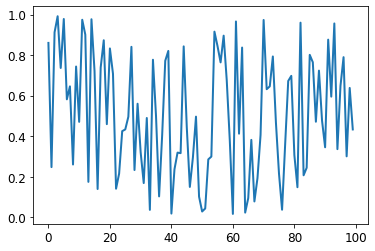

In [ ]:
plt.rcParams['savefig.dpi'] = 300

plt.plot(x)

plt.savefig('my_plot.png')
plt.savefig('my_plot.pdf')

plt.show()



Nos comandos acima os arquivos serão criados no diretório de trabalho corrente do `Python`. Se você estiver empregando o Google Colab os comandos abaixo listam o diretório corrente e os arquivos gerados. 

In [ ]:
!pwd
!ls 

/content
my_plot.pdf  my_plot.png  sample_data


## Consultado a documentação do `Matplotlib`

O https://matplotlib.org é a referência geral do `Matplotlib` e os links exatos de cada recurso podem variar de versão para versão e, por isso, não aponto links de cada recurso aqui. Mesmo assim você pode achar útil consultar os links de galeria https://matplotlib.org/stable/gallery/index.html e tutoriais  https://matplotlib.org/stable/tutorials/index.html do `Matplotlib`. Você também encontra outros links de interesse no final do livro. 



## Outros gráficos

Muitos outros gráficos, além do gráfico de linhas que vimos, podem ser produzidos com o `Matplotlib`. Alguns desses gráficos encontram-se abaixo e você pode notar que eles compartilham muitos dos recursos de gráficos de linha que vimos aqui: modos `Script` e `Artist Layer`, configuração de títulos, rótulos e legendas, os subplots etc. De fato eles diferem apenas no que se refere a propriedade específica de cada  gráfico e, por isso, essa introdução dos gráficos de linha é importante para a construção de quaisquer gráficos. 

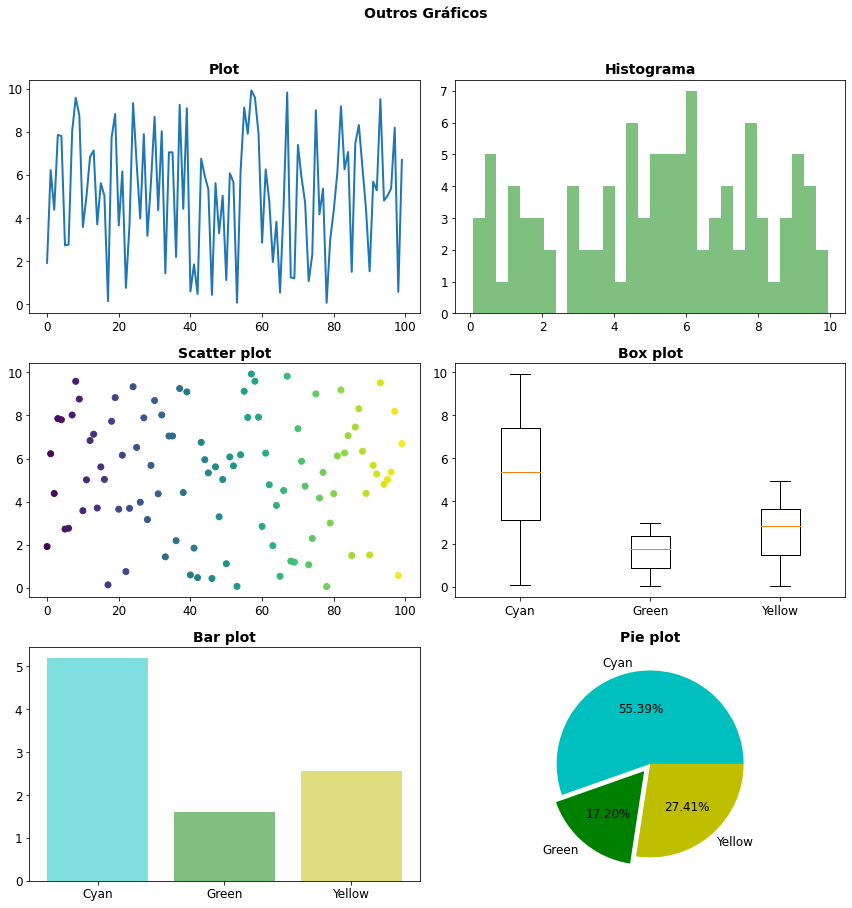

In [ ]:
# apenas a produção dos dados
x = np.random.random_sample(100)
np.random.seed(1234)

x = np.arange(0,100,1)
y = np.random.rand(100)*10
z = np.random.rand(100)*3
t = np.random.rand(100)*5

from matplotlib import cm # para cores no scatter plot

plt.figure(figsize=(12,12))                         
plt.suptitle('Outros Gráficos', fontsize=14, weight='bold', y=1.05)

plt.subplot(3, 2, 1)  
plt.plot(x,y)    
plt.title('Plot', fontsize=14, weight='bold') 

plt.subplot(3, 2, 2)  
plt.hist(y, bins=30, color='g', alpha=0.5)     
plt.title('Histograma', fontsize=14, weight='bold')    
             
plt.subplot(3, 2, 3)  
plt.scatter(x,y,c=x,cmap=cm.viridis)    
plt.title('Scatter plot', fontsize=14, weight='bold') 

plt.subplot(3, 2, 4)  
plt.boxplot([y,z,t],labels=['Cyan','Green','Yellow'])    
plt.title('Box plot', fontsize=14, weight='bold')

plt.subplot(3, 2, 5)  
plt.bar(['Cyan','Green','Yellow'],[y.mean(),z.mean(),t.mean()],color=['c','g','y'],alpha=0.5)    
plt.title('Bar plot', fontsize=14, weight='bold')

plt.subplot(3, 2, 6)  
plt.pie([y.mean(),z.mean(),t.mean()],
        colors=['c','g','y'],
        explode=[0, 0.1, 0],
        labels=['Cyan','Green','Yellow'],
        autopct='%1.2f%%')    
plt.title('Pie plot', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


## `Seaborn`

O `Seaborn` é uma outra biblioteca de visualização construída sobre o `Matplotlib`. Ela implementa uma interface de mais alto nível para as visualizações de dados. Ela compartilha uma série de comandos com o `Matplotlib` e, em muitos casos, você empregará os comandos do `Matplotlib` em conjunto com o `Seaborn`. A diferença entre as duas bibliotecas é que o `Matplotlib`, sendo uma interface de mais baixo nível, oferece mais flexibilidade sobre de como modificar os gráficos, enquanto o `Seaborn` oferece uma interface mais simples principalmente quando tratamos muitas análises multidimensionais. 

Os gráficos criados acima com `Matplotlib` são produzidos abaixo com o `Seaborn` e a *tradução* de um pacote para o outro nestes casos simples é bastante direta. Note ainda que não temos o *pie* plot no `Seaborn` e você entenderá o por quê disso no capítulo de Quantidades e Proporções.

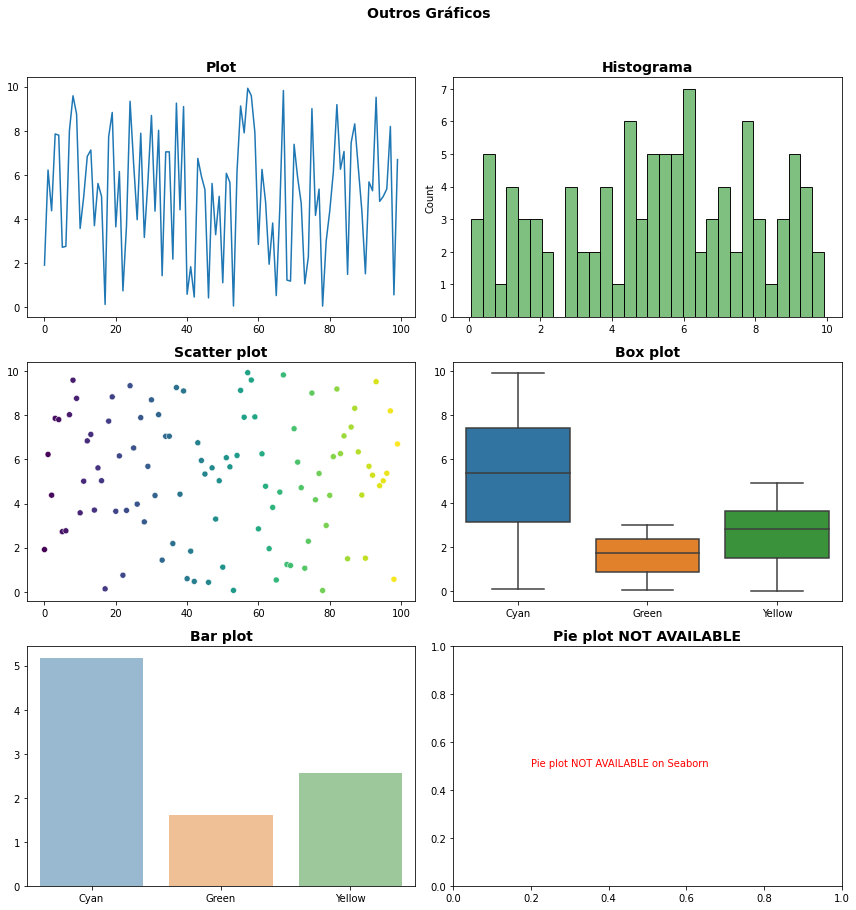

In [32]:
import seaborn as sns
import pandas as pd

# apenas a produção dos dados
x = np.random.random_sample(100)
np.random.seed(1234)

x = np.arange(0,100,1)
y = np.random.rand(100)*10
z = np.random.rand(100)*3
t = np.random.rand(100)*5

from matplotlib import cm # para cores no scatter plot

fig, ax = plt.subplots(3,2,figsize=(12,12))  
 
plt.suptitle('Outros Gráficos', fontsize=14, weight='bold', y=1.05)

sns.lineplot(x=x,y=y,ax=ax[0,0])                                        # x= e y= para evitar warnings....
ax[0,0].set_title('Plot', fontsize=14, weight='bold') 

sns.histplot(y, bins=30, color='g', alpha=0.5,ax=ax[0,1])               # para subplots somente aceite facegrid, um recurso avançado para múltiplos plots
ax[0,1].set_title('Histograma', fontsize=14, weight='bold')
             
sns.scatterplot(x=x,y=y,c=x,cmap=cm.viridis,ax=ax[1,0])                 # x= e y= para evitar warnings....
ax[1,0].set_title('Scatter plot', fontsize=14, weight='bold') 

box = pd.DataFrame({'Cyan':y,'Green':z,'Yellow':t})                     # boxplot para ser simples empregamos um dataframe para uso da função melt  
sns.boxplot(data=box,ax=ax[1,1])   
ax[1,1].set_title('Box plot', fontsize=14, weight='bold')

sns.barplot(x=['Cyan','Green','Yellow'],y=[y.mean(),z.mean(),t.mean()],alpha=0.5,ax=ax[2,0])   # x= e y= para evitar warnings.... 
ax[2,0].set_title('Bar plot', fontsize=14, weight='bold')

# não temos pie plot no seaborn
plt.text(0.2, 0.5,'Pie plot NOT AVAILABLE on Seaborn', color='r')
ax[2,1].set_title('Pie plot NOT AVAILABLE', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

## Um Gráfico Final

Como um exemplo final apresentamos uma visualização de dados para que você possa ver vários desses recursos do `Matplotlib` empregados conjuntamente em um único gráfico. 

São dados de valores normalizados do SP500 (índice da bolsa americana) e do Ibovespa (bolsa de São Paulo), destacando os impactos da Pandemia de Covid-19  ao longo do período de 2020-01-01 a 2021-04-01. Você pode empregar esse código como modelo adaptando-o para criar vários outros gráficos do seu interesse.

                  SP500      IBOV
Date                             
2020-01-02  3257.850098  118573.0
2020-01-03  3234.850098  117707.0
2020-01-06  3246.280029  116878.0
2020-01-07  3237.179932  116662.0
2020-01-08  3253.050049  116247.0


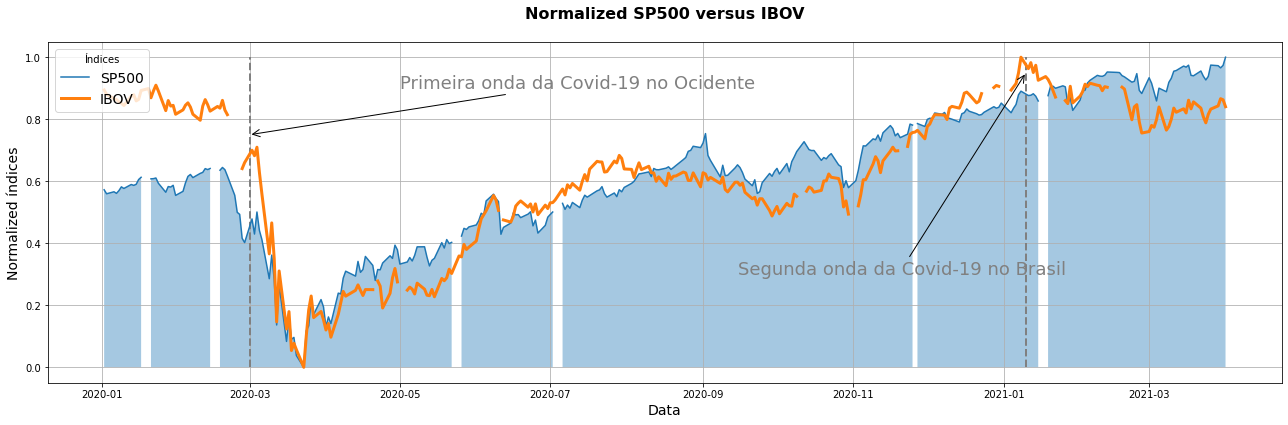

In [33]:
import datetime
import pandas as pd

# Obtendo os  dados
#-------------------------------------------------------------------------------
df = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/sp500_ibov.csv',
                 index_col=0,         # read dates como index
                 parse_dates=True)
print(df.head())
df=(df-df.min())/(df.max()-df.min()) # normalizando os valores

# Gráficos
#-------------------------------------------------------------------------------
plt.figure(figsize=(18,6))                         
plt.title('Normalized SP500 versus IBOV', fontsize=16, weight='bold', y=1.05)

plt.plot(df['SP500'], label='SP500')
plt.plot(df['IBOV'], label='IBOV',linewidth=3)

# Ornamentos
#-------------------------------------------------------------------------------

# Annotate
plt.annotate('Primeira onda da Covid-19 no Ocidente', 
             xy=(datetime.datetime(2020, 3, 1), 0.75),  # ponto do gráfico
             xytext=(datetime.datetime(2020, 5, 1), 0.9),   # posição do texto
             arrowprops=dict(arrowstyle="->"),
             fontsize=18,
             color='grey')  

plt.annotate('Segunda onda da Covid-19 no Brasil', 
             xy=(datetime.datetime(2021, 1, 10), 0.95),  # ponto do gráfico
             xytext=(datetime.datetime(2020, 9, 15), 0.3),   # posição do texto
             arrowprops=dict(arrowstyle="->"),
             fontsize=18,
             color='grey')              

# Linhas verticais
plt.vlines(datetime.datetime(2020, 3, 1),0,1,linewidth=2,linestyle='--',colors='grey') 
plt.vlines(datetime.datetime(2021, 1, 10),0,1,linewidth=2,linestyle='--',colors='grey') 

# Fill
plt.fill_between(df.index, y1=df['SP500'], y2=0, alpha=0.4)    

# Add grid
plt.grid()

# Labels
plt.xlabel('Data',fontsize=14)
plt.ylabel('Normalized índices',fontsize=14)

# Legenda
plt.legend(title='Índices',loc='upper left',fontsize=14)

# Finaliza
plt.tight_layout()                    
plt.show()